In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torch.utils.data import dataset
from matplotlib import pyplot as plt
import numpy as np

In [2]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomRotation(10),
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize((0.1307,),(0.3081,))
])
mnist_train = torchvision.datasets.MNIST('./data', train = True, download = True, transform = transform)

In [3]:
mnist_test = torchvision.datasets.MNIST('./data', train = False, download = True, transform = transform)

In [4]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [5]:
len(mnist_train)

60000

In [6]:
len(mnist_test)

10000

In [7]:
image = mnist_train.data[0]

In [8]:
image.shape

torch.Size([28, 28])

In [9]:
image[0][0]

tensor(0, dtype=torch.uint8)

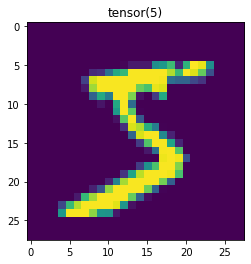

In [10]:
plt.imshow(image)
plt.title(mnist_train.targets[0])
plt.show()

In [11]:
train_loader = DataLoader(mnist_train, batch_size = 1000, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size = 1000, shuffle = False)

In [12]:
for x, y in train_loader:
    print(x.shape, y.shape)
    print(x[0][0][0][0], y[0])
    break

torch.Size([1000, 1, 28, 28]) torch.Size([1000])
tensor(-0.4242) tensor(9)


In [13]:
class Net(nn.Module):
    def __init__(self, hidden_feature_size=100):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5) #feature extraction
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5) #feature extraction
        self.fc1 = nn.Linear(320, 100)
        self.fc2 = nn.Linear(hidden_feature_size, 10)
        self.dp = nn.Dropout2d()
        self.relu = nn.ReLU() #0-g ustgaad busdiig ni uldeene
    def forward(self, x):
        x = nn.functional.max_pool2d(self.dp(self.relu(self.conv1(x))),2)#nn.functional gej funktsee shuud ashiglana 
        x = nn.functional.max_pool2d(self.dp(self.relu(self.conv2(x))),2)
        x = x.view(-1, 320)
        x = self.relu(self.fc1(x))
        x = nn.functional.log_softmax(self.fc2(x), dim = -1)
        return x

In [14]:
dummy_data = torch.rand(10, 1, 28, 28)

In [15]:
dummy_data.shape

torch.Size([10, 1, 28, 28])

In [16]:
net = Net()

In [17]:
out = net(dummy_data)
out.shape

torch.Size([10, 10])

In [18]:
out

tensor([[-2.2921, -2.3549, -2.2975, -2.3374, -2.3907, -2.2589, -2.2022, -2.2529,
         -2.3151, -2.3381],
        [-2.2759, -2.3235, -2.2914, -2.3214, -2.4151, -2.2207, -2.2860, -2.2654,
         -2.2563, -2.3858],
        [-2.2928, -2.3032, -2.2513, -2.2845, -2.4339, -2.2832, -2.2390, -2.2412,
         -2.3719, -2.3419],
        [-2.3274, -2.3752, -2.2561, -2.3698, -2.4252, -2.2732, -2.2159, -2.1619,
         -2.3386, -2.3113],
        [-2.2723, -2.3849, -2.2693, -2.2888, -2.4321, -2.2668, -2.2015, -2.2785,
         -2.2806, -2.3724],
        [-2.3144, -2.3243, -2.2673, -2.3270, -2.4137, -2.2386, -2.2320, -2.2403,
         -2.3349, -2.3487],
        [-2.3593, -2.4021, -2.2475, -2.3685, -2.4265, -2.3083, -2.1426, -2.1739,
         -2.3426, -2.2948],
        [-2.3305, -2.3646, -2.2473, -2.3553, -2.4029, -2.2937, -2.1991, -2.1650,
         -2.3634, -2.3318],
        [-2.2812, -2.3082, -2.3328, -2.2816, -2.4277, -2.2478, -2.2242, -2.2652,
         -2.3271, -2.3451],
        [-2.2615, -

In [19]:
def train(net, train_loader, test_loader, loss_fn, optimizer, epochs):
    net.train()
    accuracy = torch.tensor([0.])
    for x, y in train_loader:
        optimizer.zero_grad() #omnoh surgaltiin gradient 0 baih yostoi
        preds = net(x)
        print(preds.shape)
        loss = loss_fn(preds, y) #loss function 
        loss.backward() #backpropagation, update hiideg
        optimizer.step()
        print(net.fc2.weight.grad[0][0])
        print(net.fc1.weight.grad[0][0])
        print(net.conv1.weight.grad[0][0])
        print(net.conv2.weight.grad[0][0])
        print(loss.item())
        break
        
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, momentum = 0.5)
epochs = 1
train(net, train_loader, test_loader, loss_fn, optimizer, epochs)


torch.Size([1000, 10])
tensor(0.0003)
tensor(0.0005)
tensor([[-2.4146e-03,  3.9678e-04,  1.9275e-03,  8.3471e-04,  2.3794e-04],
        [ 4.9990e-04, -7.2606e-04,  6.6137e-04, -8.7833e-04, -1.5864e-03],
        [ 1.9611e-03,  2.1654e-03,  2.4943e-03,  5.3560e-06, -1.5356e-03],
        [ 4.7223e-03,  5.0009e-03,  5.1277e-03,  2.3703e-03,  1.1460e-03],
        [ 5.6549e-03,  5.7179e-03,  5.4456e-03,  3.2417e-03,  9.4610e-04]])
tensor([[ 0.0019,  0.0005,  0.0033,  0.0048,  0.0020],
        [ 0.0016, -0.0004,  0.0010,  0.0047,  0.0038],
        [ 0.0023,  0.0007,  0.0002,  0.0038,  0.0038],
        [ 0.0018,  0.0009,  0.0013,  0.0033,  0.0040],
        [ 0.0008,  0.0014,  0.0019,  0.0033,  0.0039]])
2.3103089332580566


In [20]:
def train(net, train_loader, test_loader, loss_fn, optimizer, epochs):
    net.train()
    for e in range(epochs):
        accuracy = torch.tensor([0.])
        for x, y in train_loader:
            optimizer.zero_grad()
            preds = net(x)
            loss = loss_fn(preds, y)
            loss.backward() #backpropagation, update hiideg
            optimizer.step()
            preds = preds.data.max(1, keepdim = True)[1]
            accuracy += preds.eq(y.data.view_as(preds)).sum()
        print('epochs:', e, 'Accuracy:', accuracy.item()*100/len(mnist_train))
        eval(net, test_loader)
def eval(net, test_loader):
    net.eval()
    accuracy = torch.tensor([0])
    for x, y in test_loader:
        preds = net(x)
        preds = preds.data.max(1, keepdim = True)[1]
        accuracy += preds.eq(y.data.view_as(preds)).sum()
    print("test acc:", accuracy.item()*100/len(mnist_test))
        
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, momentum = 0.5)
epochs = 2
train(net, train_loader, test_loader, loss_fn, optimizer, epochs)


epochs: 0 Accuracy: 10.42
test acc: 9.79
epochs: 1 Accuracy: 10.471666666666666
test acc: 10.57


In [21]:
torch.save(net.state_dict(), './checkpoints') #model ee hadgalna

In [22]:
del net #model-ee ustgana

In [23]:
cnn = Net() #shineer model-ee duudaj ugnu

In [24]:
train(cnn, train_loader, test_loader, loss_fn, optimizer, epochs)


epochs: 0 Accuracy: 9.966666666666667
test acc: 10.16
epochs: 1 Accuracy: 10.573333333333334
test acc: 9.88


In [25]:
cnn.load_state_dict(torch.load('./checkpoints')) #hadgalsan model-ee load hiine

<All keys matched successfully>

In [26]:
train(cnn, train_loader, test_loader, loss_fn, optimizer, epochs)


epochs: 0 Accuracy: 10.811666666666667
test acc: 10.69
epochs: 1 Accuracy: 11.076666666666666
test acc: 10.9


 Confusion Matrix


In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)


In [29]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4697 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2670 - accuracy: 0.9251


In [30]:
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9239


[0.2674504220485687, 0.9239000082015991]

In [31]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]


313/313 [==============================] - 0s 1ms/step


array([2.9263144e-02, 2.6082768e-07, 4.9746823e-02, 9.5929313e-01,
       2.2295818e-03, 8.6859442e-02, 1.7399142e-06, 9.9977255e-01,
       5.6344558e-02, 6.2228209e-01], dtype=float32)

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)


In [34]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,    9,  924,   17,   12,    4,   12,   11,   33,    3],
       [   3,    0,   18,  924,    0,   28,    2,   10,   15,   10],
       [   1,    1,    4,    1,  923,    0,   10,    4,    6,   32],
       [  11,    3,    2,   30,   11,  778,   17,    7,   26,    7],
       [  13,    3,    8,    1,    8,   10,  912,    2,    1,    0],
       [   1,    6,   21,    7,    9,    0,    0,  954,    1,   29],
       [  11,   12,    6,   29,   10,   34,    9,   14,  835,   14],
       [  11,    7,    1,   12,   32,    7,    0,   29,    2,  908]])>

Text(69.0, 0.5, 'Truth')

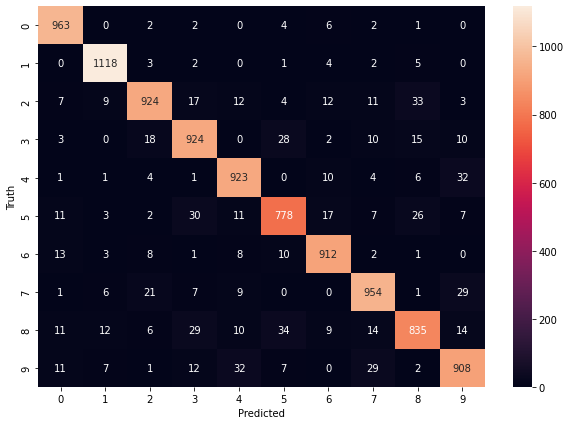

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')